In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [59]:
def generer_grille(largeur, longueur):
    return np.zeros((largeur, longueur), dtype=str)

def ajouter_mot_grille(mot, grille):
    sens = random.randint(0, 1)
    largeur, longueur = grille.shape
    position_solution = []

    for _ in range(100):  # Essayez 100 fois pour ajouter le mot
        if sens == 0:  # Horizontal
            y = random.randint(0, longueur - 1)
            x = random.randint(0, largeur - len(mot))

            conflict = False
            for i, char in enumerate(mot):
                if grille[x + i, y] and grille[x + i, y] != char:
                    conflict = True
                    break

            if not conflict:
                for i, char in enumerate(mot):
                    position_solution.append((x+i, y))
                    grille[x + i, y] = char
                return position_solution

        else:  # Vertical
            x = random.randint(0, largeur - 1)
            y = random.randint(0, longueur - len(mot))

            conflict = False
            for i, char in enumerate(mot):
                if grille[x, y + i] and grille[x, y + i] != char:
                    conflict = True
                    break

            if not conflict:
                for i, char in enumerate(mot):
                    position_solution.append((x, y+i))
                    grille[x, y + i] = char
                return position_solution

    # Si on ne trouve pas une place en 100 essais, retourner une liste vide pour signaler un échec.
    return []

# ... (restez avec le reste du code)



def remplir_grille(grille):
    for i in range(grille.shape[0]):
        for j in range(grille.shape[1]):
            if grille[i, j] == '':
                grille[i, j] = chr(random.randint(ord('A'), ord('Z')))


def afficher_grille(grille):
    for row in grille:
        print(" ".join(row))

def afficher_grille_jeu(grille, titre=""):
    facteur_reduction = 0.5
    taille_figure = (grille.shape[1] * facteur_reduction, grille.shape[0] * facteur_reduction)
    
    fig, ax = plt.subplots(figsize=taille_figure)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(len(grille[0])) + 0.5, minor=False)
    ax.set_yticks(np.arange(len(grille)) + 0.5, minor=False)
    ax.grid(which='both')
    ax.tick_params(which='both', length=0)
    for i in range(len(grille)):
        for j in range(len(grille[0])):
            if grille[i, j]:
                ax.text(j + 0.5, len(grille) - i - 0.5, grille[i, j], ha='center', va='center', fontsize=20)
    plt.axis('off')
    if titre:
        plt.title(titre, fontsize=14, y=1.05)
    plt.show()

def tout_faire(grille,liste_mot,largeur,longueur):
    liste_sol=[]
    for i in liste_mot:
        positions_mot = ajouter_mot_grille(i, grille)
        liste_sol.append(positions_mot)
    remplir_grille(grille)
    afficher_grille_jeu(grille,f"Trouve les {len(liste_mot)} mots")
    return liste_sol

def afficher_grille_solution(grille, liste_sol, titre=""):
    positions_solution = [pos for sublist in liste_sol for pos in sublist]
    
    facteur_reduction = 0.5
    taille_figure = (grille.shape[1] * facteur_reduction, grille.shape[0] * facteur_reduction)
    
    fig, ax = plt.subplots(figsize=taille_figure)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(len(grille[0])) + 0.5, minor=False)
    ax.set_yticks(np.arange(len(grille)) + 0.5, minor=False)
    ax.grid(which='both')
    ax.tick_params(which='both', length=0)
    
    for i in range(len(grille)):
        for j in range(len(grille[0])):
            if grille[i, j]:
                if (i, j) in positions_solution:
                    ax.text(j + 0.5, len(grille) - i - 0.5, grille[i, j], ha='center', va='center', fontsize=20, color='red')
                else:
                    ax.text(j + 0.5, len(grille) - i - 0.5, grille[i, j], ha='center', va='center', fontsize=20)
    
    plt.axis('off')
    if titre:
        plt.title(titre, fontsize=14, y=1.05)
    plt.show()


def grille_et_solution(liste_mot,longueur,largeur):
    grille=generer_grille(largeur,longueur)
    liste_sol=tout_faire(grille,liste_mot,largeur,longueur)
    afficher_grille_solution(grille, liste_sol, "GRILLE SOLUTION")

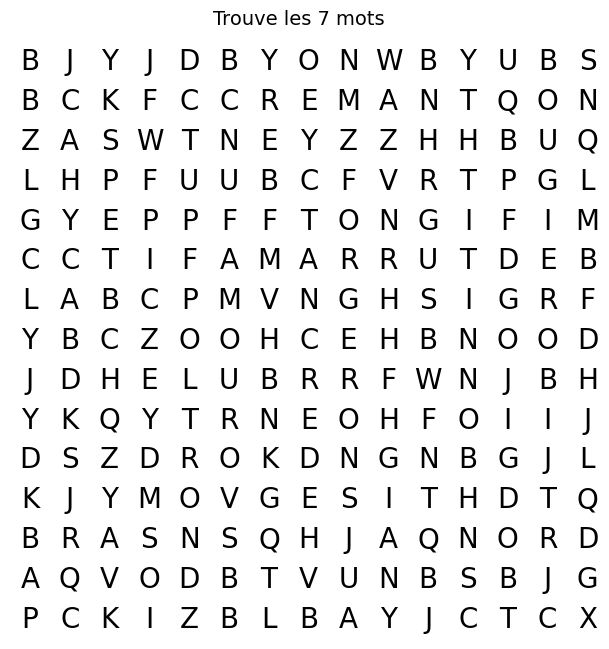

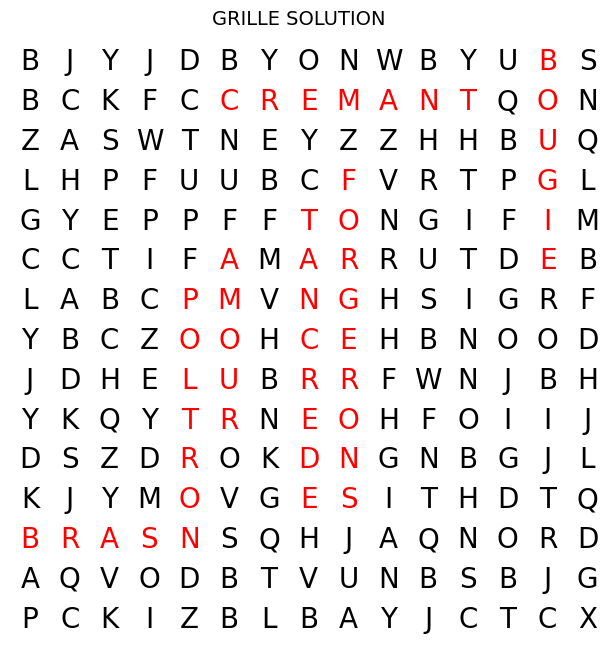

In [62]:
largeur,longueur=15,15
liste_mot=["POLTRON","TANCREDE","AMOUR","CREMANT","BOUGIE","BRAS","FORGERONS"]
grille_et_solution(liste_mot,longueur,largeur)